# 📚 Project: Customer Segmentation using K-Means

## 1. Problem Statement
- Cluster customers into groups based on Age, Income, and Spending Score.

In [40]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


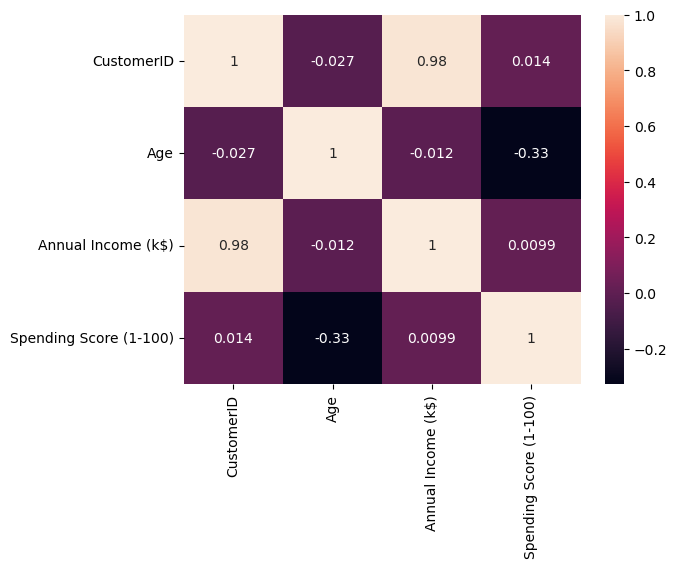

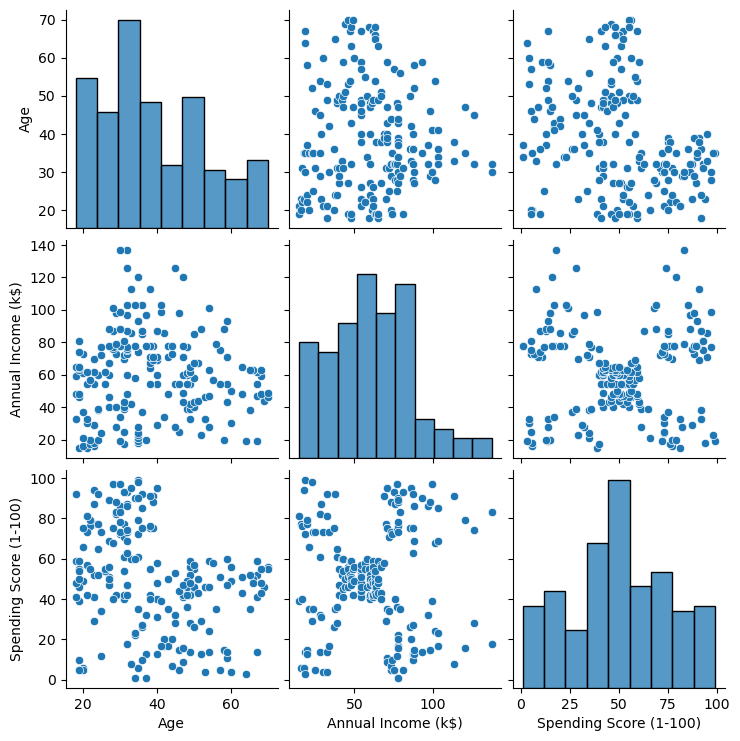

In [41]:
# Basic info
df.info()
df.describe()
# Only select numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Now plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True)

# Check for missing values
df.isnull().sum()

# Visualize features
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
#sns.heatmap(df.corr(), annot=True)#

In [42]:
  # Selecting useful features
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Feature scaling (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

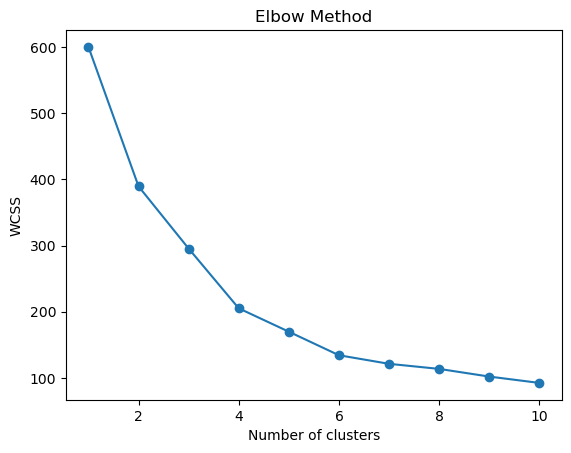

In [43]:
wcss = []  # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [44]:
# Choose optimal clusters from Elbow curve, e.g., k=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to data
df['Cluster'] = clusters

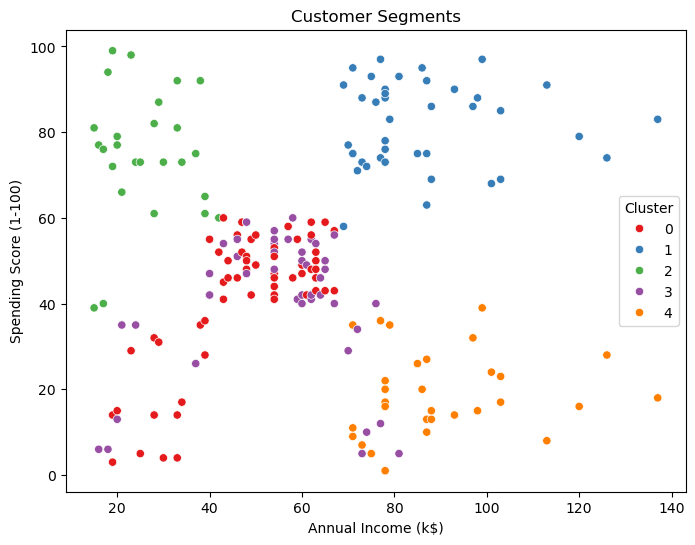

In [45]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments')
plt.show()

In [46]:
import plotly.express as px
import pandas as pd

# Load your data (replace with your actual clustered DataFrame)
df = pd.read_csv('Mall_Customers.csv')
df['Cluster'] = clusters  # Add the cluster labels you got from KMeans

# Rename columns if needed (Plotly likes clean names)
df.columns = ['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score', 'Cluster']

# Bubble Plot: Income vs Spending Score with Age as size
fig = px.scatter(
    df,
    x='Annual Income',
    y='Spending Score',
    color='Cluster',
    size='Age',
    hover_data=['Gender'],
    title='Customer Segments by Income, Spending, and Age',
    color_continuous_scale='Viridis'
)
fig.show()


In [47]:
label_map = {
    0: 'Mature Average Spenders',
    1: 'High Value Customers',
    2: 'Young Impulsive Spenders',
    3: 'Standard Young Customers',
    4: 'Wealthy Conservative Customers'
}

df['Segment'] = df['Cluster'].map(label_map)

In [48]:
fig = px.scatter(
    df,
    x='Annual Income',
    y='Spending Score',
    color='Segment',
    size='Age',
    hover_data=['Gender'],
    title='Customer Segments by Income, Spending, and Age',
    color_continuous_scale='Viridis'
)
fig.show()

In [49]:
fig = px.pie(
    df,
    names='Gender',
    title='Gender Distribution of Customers',
    hole=0.4  # donut chart style
)
fig.show()

In [50]:
fig = px.histogram(
    df,
    x='Cluster',
    title='Number of Customers in Each Cluster',
    color='Segment'
)
fig.show()

In [51]:
fig = px.box(
    df,
    x='Cluster',
    y='Spending Score',
    color='Segment',
    title='Spending Distribution per Cluster'
)
fig.show()

In [52]:
df.groupby('Cluster').mean(numeric_only=True)

,CustomerID,Age,Annual Income,Spending Score
Cluster,,,,
0,68.775862,55.275862,47.620690,41.706897
1,161.025000,32.875000,86.100000,81.525000
2,23.461538,25.769231,26.115385,74.846154
3,86.377778,26.733333,54.311111,40.911111
4,166.870968,44.387097,89.774194,18.483871


In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df[['Annual Income', 'Spending Score', 'Age']])
df['PCA1'], df['PCA2'] = pca_components[:, 0], pca_components[:, 1]


In [54]:
df.groupby('Segment')['Spending Score'].mean() * df['Segment'].value_counts()

Segment
High Value Customers              3261.0
Mature Average Spenders           2419.0
Standard Young Customers          1841.0
Wealthy Conservative Customers     573.0
Young Impulsive Spenders          1946.0
dtype: float64

In [55]:
segment_summary = df.groupby('Segment').agg({
    'Age': 'mean',
    'Annual Income': 'mean',
    'Spending Score': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Customer Count'})

segment_summary = segment_summary.round(1)
display(segment_summary)

,Age,Annual Income,Spending Score,Customer Count
Segment,,,,
High Value Customers,32.9,86.1,81.5,40
Mature Average Spenders,55.3,47.6,41.7,58
Standard Young Customers,26.7,54.3,40.9,45
Wealthy Conservative Customers,44.4,89.8,18.5,31
Young Impulsive Spenders,25.8,26.1,74.8,26


In [56]:
revenue_estimate = df.groupby('Segment')['Spending Score'].mean() * df['Segment'].value_counts()
revenue_estimate = revenue_estimate.round(2)
print(revenue_estimate)

Segment
High Value Customers              3261.0
Mature Average Spenders           2419.0
Standard Young Customers          1841.0
Wealthy Conservative Customers     573.0
Young Impulsive Spenders          1946.0
dtype: float64


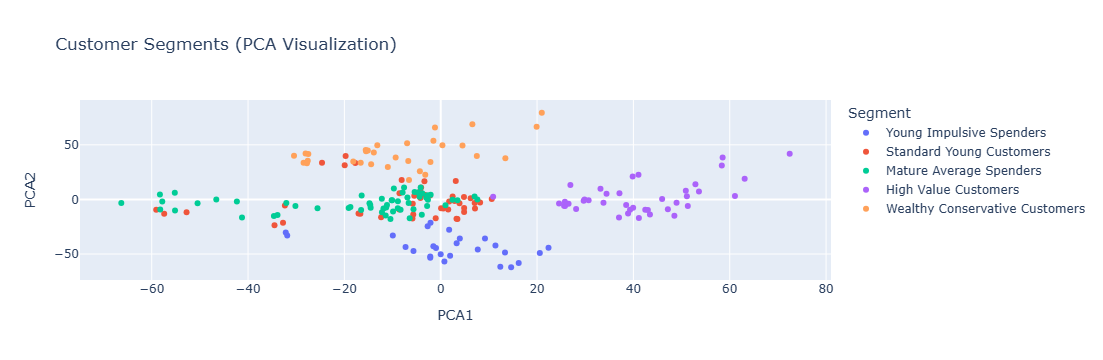

In [57]:
from sklearn.decomposition import PCA
import plotly.express as px

features = ['Annual Income', 'Spending Score', 'Age']
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features])
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

fig = px.scatter(
    df, x='PCA1', y='PCA2', color='Segment',
    title='Customer Segments (PCA Visualization)',
    hover_data=['Age', 'Annual Income', 'Spending Score']
)
fig.show()

🧍‍♂️📑 Customer Personas
1️⃣ High Value Customers
👥 Count: 40

👤 Avg Age: 32.9

💰 Income: $86.1k

🛍️ Spending: 81.5

🧠 Persona:
Young professionals with high income and high spending. Likely tech-savvy, brand-conscious, and responsive to loyalty rewards and premium offerings.

🎯 Strategy:

Prioritize for VIP loyalty programs

Offer premium upgrades and early access

Upsell high-end products

2️⃣ Mature Average Spenders
👥 Count: 58

👤 Avg Age: 55.3

💰 Income: $47.6k

🛍️ Spending: 41.7

🧠 Persona:
Older, stable customers with moderate income and spending. Value-conscious and possibly brand-loyal.

🎯 Strategy:

Promote value bundles and seasonal offers

Consider personalized recommendations

Engage via email/newsletters

3️⃣ Standard Young Customers
👥 Count: 45

👤 Avg Age: 26.7

💰 Income: $54.3k

🛍️ Spending: 40.9

🧠 Persona:
Young working adults with average income and moderate spending. Might be occasional or pragmatic shoppers.

🎯 Strategy:

Introduce flash sales, time-limited discounts

Push mobile/app-based engagement

Monitor for potential upgrade to high spenders

4️⃣ Wealthy Conservative Customers
👥 Count: 31

👤 Avg Age: 44.4

💰 Income: $89.8k

🛍️ Spending: 18.5

🧠 Persona:
High-income but low-spending customers. Possibly cautious or brand-agnostic.

🎯 Strategy:

Educate on premium product value

Use testimonials, quality assurance

Test luxury subscription or trial options

5️⃣ Young Impulsive Spenders
👥 Count: 26

👤 Avg Age: 25.8

💰 Income: $26.1k

🛍️ Spending: 74.8

🧠 Persona:
Low-income but high-spending — likely trend-driven, social media influenced, and impulsive.

🎯 Strategy:

Promote with flash deals and gamified discounts

Leverage influencers or social commerce

Upsell affordable high-margin products

💰📊 Revenue Impact Analysis

Segment	Est. Revenue Potential
High Value Customers	$3,261
Mature Average Spenders	$2,419
Young Impulsive Spenders	$1,946
Standard Young Customers	$1,841
Wealthy Conservative Customers	$573

✅ Insights:

Cluster 1: High Value Customers drive the most potential revenue — top priority!

Young Impulsive Spenders (Cluster 2) punch above their weight — invest in retention.

Wealthy Conservatives show the lowest ROI — consider re-engagement tactics.